## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
dfPlayer = pd.read_csv('nba_all_season.csv')
dfPlayer.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


## EDA

In [11]:
dfPlayer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
Unnamed: 0           11145 non-null int64
Unnamed: 0.1         11145 non-null int64
player_name          11145 non-null object
team_abbreviation    11145 non-null object
age                  11145 non-null float64
player_height        11145 non-null float64
player_weight        11145 non-null float64
college              11145 non-null object
country              11145 non-null object
draft_year           11145 non-null object
draft_round          11145 non-null object
draft_number         11145 non-null object
gp                   11145 non-null int64
pts                  11145 non-null float64
reb                  11145 non-null float64
ast                  11145 non-null float64
net_rating           11145 non-null float64
oreb_pct             11145 non-null float64
dreb_pct             11145 non-null float64
usg_pct              11145 non-null float64
ts_pct               111

In [12]:
dfPlayer.describe()

,Unnamed: 0,Unnamed: 0.1,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,best_player
count,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000,11145.000000
mean,5572.000000,5572.000000,27.168686,200.812818,100.637868,52.005832,8.126487,3.560036,1.801463,-2.153899,0.055593,0.141772,0.185599,0.508099,0.131078,0.020099
std,3217.428709,3217.428709,4.344164,9.190973,12.576295,25.069495,5.935482,2.495394,1.789940,12.150611,0.043889,0.063194,0.053047,0.098879,0.095017,0.140344
min,0.000000,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2786.000000,2786.000000,24.000000,195.580000,90.718400,32.000000,3.500000,1.800000,0.600000,-6.300000,0.022000,0.096000,0.150000,0.478000,0.065000,0.000000
50%,5572.000000,5572.000000,27.000000,200.660000,99.790240,58.000000,6.600000,3.000000,1.200000,-1.300000,0.043000,0.132000,0.182000,0.521000,0.102000,0.000000
75%,8358.000000,8358.000000,30.000000,208.280000,109.315672,74.000000,11.500000,4.700000,2.400000,3.200000,0.086000,0.182000,0.218000,0.557000,0.178000,0.000000
max,11144.000000,11144.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.000000


In [29]:
list_item = []
for col in dfPlayer.columns:
    list_item.append([col, dfPlayer[col].dtype, dfPlayer[col].isna().sum(), round((dfPlayer[col].isna().sum()/len(dfPlayer[col]))*100,2),
                      dfPlayer[col].nunique(), list(dfPlayer[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPct', 'unique', 'uniqueSample'],data=list_item)

In [30]:
dfDesc

,feature,data_type,null,nulPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.0,11145,"[10420, 9891, 9081, 7875, 6304]"
1,Unnamed: 0.1,int64,0,0.0,11145,"[5948, 1395, 1708, 4305, 8578]"
2,player_name,object,0,0.0,2235,"[Duane Causwell, Brandan Wright, Mark Strickla..."
3,team_abbreviation,object,0,0.0,36,"[NJN, SAC, MEM, MIN, PHI]"
4,age,float64,0,0.0,27,"[23.0, 24.0, 22.0, 26.0]"
5,player_height,float64,0,0.0,30,"[182.88, 200.66, 190.5, 203.2]"
6,player_weight,float64,0,0.0,157,"[99.79024, 111.13004, 106.140528, 108.86208, 1..."
7,college,object,0,0.0,316,"[Michigan State, Baylor, Kentucky, Tennessee-C..."
8,country,object,0,0.0,76,"[USA, Croatia, Ukraine]"
9,draft_year,object,0,0.0,45,"[Undrafted, 2006, 2005, 2013]"


In [33]:
dfPlayer['best_player'].value_counts()

0    10921
1      224
Name: best_player, dtype: int64

## 1. Feature Selection

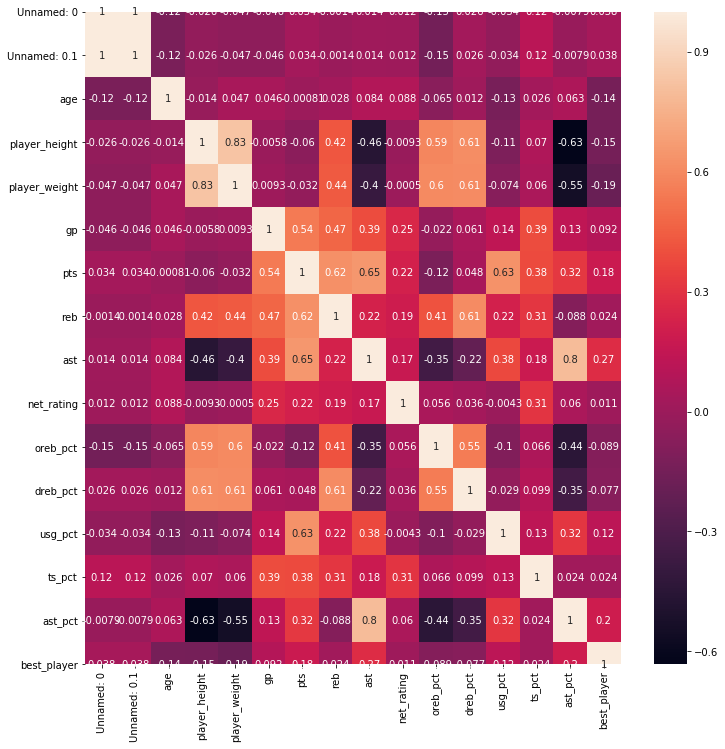

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(dfPlayer.corr(), annot=True)

In [38]:
dfPlayer.country.value_counts()

USA           9410
France         153
Canada         140
Spain           79
Brazil          78
              ... 
Angola           1
Ghana            1
Sudan (UK)       1
Sudan            1
Guinea           1
Name: country, Length: 76, dtype: int64

In [40]:
dfPlayer.draft_year.value_counts()

Undrafted    1942
1998          454
2003          430
2005          420
1996          406
2001          403
2008          381
1999          366
2000          364
2004          362
2009          357
1997          345
2007          334
1995          328
2002          325
2011          318
2006          315
2010          281
2012          279
1994          273
2013          248
1992          232
2014          223
1993          210
2015          186
2016          166
1990          162
1991          149
2017          145
1988          127
1989          123
2018          103
1987           90
1985           86
2019           53
1986           52
1984           49
1983           22
1981           16
1982           11
1980            3
1979            3
1978            1
1976            1
1963            1
Name: draft_year, dtype: int64

In [41]:
dfPlayer.draft_round.value_counts()

1            6513
2            2629
Undrafted    1959
3              20
4              12
7               5
6               5
8               2
Name: draft_round, dtype: int64

In [39]:
dfPlayer.draft_number.value_counts()

Undrafted    1959
5             320
1             320
4             311
3             299
             ... 
127             1
78              1
66              1
63              1
120             1
Name: draft_number, Length: 75, dtype: int64

In [42]:
dfPlayer.season.value_counts()

2017-18    540
2018-19    530
2019-20    514
2014-15    492
2016-17    486
2013-14    482
2011-12    478
2015-16    476
2012-13    469
2004-05    464
2005-06    458
2006-07    458
2010-11    452
2007-08    451
2008-09    445
2009-10    442
2003-04    442
1996-97    441
2000-01    441
2001-02    440
1998-99    439
1997-98    439
1999-00    438
2002-03    428
Name: season, dtype: int64

In [46]:
dfPlayer.player_name.value_counts()

Vince Carter       22
Dirk Nowitzki      21
Kobe Bryant        20
Kevin Garnett      20
Tyson Chandler     19
                   ..
Desmond Penigar     1
Jordan Poole        1
Anthony Bowie       1
Lou Roe             1
Troy Bell           1
Name: player_name, Length: 2235, dtype: int64

In [49]:
dfPlayer[dfPlayer['player_name']=='Allen Iverson']

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
147,147,147,Allen Iverson,PHI,22.0,182.88,74.84268,Georgetown,USA,1996,...,4.1,7.5,-7.0,0.040,0.072,0.284,0.513,0.320,1996-97,1
754,754,754,Allen Iverson,PHI,23.0,182.88,74.84268,Georgetown,USA,1996,...,3.7,6.2,-2.8,0.031,0.076,0.267,0.535,0.294,1997-98,1
1017,1017,1017,Allen Iverson,PHI,24.0,182.88,74.84268,Georgetown,USA,1996,...,4.9,4.6,3.6,0.038,0.101,0.323,0.508,0.234,1998-99,1
1465,1465,1465,Allen Iverson,PHI,25.0,182.88,74.84268,Georgetown,USA,1996,...,3.8,4.7,1.2,0.027,0.078,0.339,0.496,0.220,1999-00,1
1907,1907,1907,Allen Iverson,PHI,26.0,182.88,74.84268,Georgetown,USA,1996,...,3.8,4.6,5.7,0.019,0.081,0.354,0.518,0.226,2000-01,0
2490,2490,2490,Allen Iverson,PHI,27.0,182.88,74.84268,Georgetown,USA,1996,...,4.5,5.5,5.1,0.019,0.093,0.371,0.489,0.266,2001-02,0
2708,2708,2708,Allen Iverson,PHI,28.0,182.88,74.84268,Georgetown,USA,1996,...,4.2,5.5,1.8,0.022,0.095,0.327,0.500,0.248,2002-03,0
3507,3507,3507,Allen Iverson,PHI,29.0,182.88,74.84268,Georgetown,USA,1996,...,3.7,6.8,-2.1,0.019,0.079,0.343,0.478,0.325,2003-04,0
3815,3815,3815,Allen Iverson,PHI,30.0,182.88,74.84268,Georgetown,USA,1996,...,4.0,7.9,0.3,0.018,0.089,0.347,0.532,0.361,2004-05,0
4271,4271,4271,Allen Iverson,PHI,31.0,182.88,74.84268,Georgetown,USA,1996,...,3.2,7.4,0.8,0.016,0.071,0.354,0.543,0.331,2005-06,0


In [43]:
dfPlayer.head()

,Unnamed: 0,Unnamed: 0.1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,best_player
0,0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [71]:
data = dfPlayer.drop(['best_player', 'Unnamed: 0', 'Unnamed: 0.1','player_name', 'team_abbreviation', 'college','country','draft_year',
                     'draft_round','draft_number','season'], axis=1)
target= dfPlayer['best_player']

In [72]:
data

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056


In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(data)
scaled_features = scaler.transform(data)

In [225]:
dataScaled = pd.DataFrame(scaled_features, columns=data.columns)
dataScaled.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,2.033006,-0.292998,-0.067402,0.119440,-0.408829,5.025470,0.725497,1.502370,2.971452,2.867924,-1.613728,-0.294306,-0.190264
1,0.191372,1.641595,1.375352,-1.476196,-0.981681,-0.825572,-0.838872,1.189615,0.510564,0.146034,-0.199814,-0.789883,-0.874381
2,2.723619,0.536113,-0.428090,-1.715542,-1.234410,-1.025951,-0.783001,0.004436,1.125786,-0.629388,-1.557171,-1.336030,0.178107
3,-0.729445,0.259743,0.004736,0.478458,-0.745801,-0.504967,-0.671261,-0.538771,0.100416,0.114384,-0.350632,-1.103412,-0.569160
4,1.572598,0.536113,0.653975,-0.997505,-0.964832,-0.464892,-0.894742,-0.744531,1.216930,0.589132,-1.104719,1.040719,-0.958580


In [73]:
target.value_counts()

0    10921
1      224
Name: best_player, dtype: int64

## 2. Data Insight

In [210]:
# Pemain tertinggi
highest_player = dfPlayer.sort_values('player_height', ascending=False).head(1).iloc[0,2]
highest_height = dfPlayer.sort_values('player_height', ascending=False).head(1).iloc[0,5]
print(f' pemain tertinggi adalah {highest_player} dengan tinggi sebesar {highest_height} cm.')

 pemain tertinggi adalah Gheorghe Muresan dengan tinggi sebesar 231.14 cm.


In [236]:
# Pemain terberat
biggest_player = dfPlayer.sort_values('player_weight', ascending=False).head(1).iloc[0,2]
biggest_height = dfPlayer.sort_values('player_weight', ascending=False).head(1).iloc[0,5]
print(f' pemain terberat adalah {biggest_player} dengan berat sebesar {biggest_height} kg.')

 pemain terberat adalah Sim Bhullar dengan berat sebesar 226.06 kg.


In [239]:
# Hubungan antara umur dan banyak permainan
df = dataScaled['age gp'.split()]
df.corr()
# Hubungan antara umur dan gp sangat kecil. Sehingga dapat diambil kesimpulan bahwa
# pemain memiliki kesempatan bermain yang sama untuk tiap umurnya.

,age,gp
age,1.000000,0.046221
gp,0.046221,1.000000


In [240]:
# Hubungan antara point yang dibuat dengan jumlah assist
df = dataScaled['pts ast'.split()]
df.corr()
# Meskipun hubungan antara banyak poin per musim dengan banyak assist belum dapat dikatakan dekat (dibawah 0.7)
# Tetapi ada kecenderungan antara semakin besarnya point yang dibuat oleh pemain maka semakin banyak juga assist yang dilakukan.

,pts,ast
pts,1.000000,0.652098
ast,0.652098,1.000000


In [232]:
# Hubungan tinggi dengan shoot efficientcy
df = dataScaled['player_height ts_pct'.split()]
df.corr()
# Sehingga dapat diketahui bahwa tidak ada hubungan antara tinggi pemain dengan shooting efficiency pemain

,player_height,ts_pct
player_height,1.00000,0.06981
ts_pct,0.06981,1.00000


## 3. Training Set Setup

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataScaled, target, test_size=.22, random_state=101)

In [242]:
X_train

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
8171,-0.729445,-1.122110,-0.969123,1.196495,2.169005,0.416772,2.457476,0.547643,-0.856596,-0.360364,1.534586,0.524914,1.620016
8053,-1.420058,-0.845739,-0.788779,0.677913,-0.071857,-0.665270,0.278534,0.210196,-0.742666,-0.803463,0.554273,-0.263964,0.651727
7378,-0.729445,-2.780333,-1.329811,1.076822,0.972755,-0.625194,1.228329,-0.160172,-0.924954,-1.072487,0.799351,0.666508,1.177971
1298,0.881985,0.812484,0.906457,-0.439033,0.147175,0.657226,-0.336039,0.119662,-0.013514,0.620782,-0.105554,0.393435,-0.527060
956,0.881985,0.812484,0.293287,-0.159796,-0.408829,0.056092,-0.615390,-0.077868,0.556136,0.842331,0.705090,-0.638176,-0.569160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,-1.189853,-1.674851,-1.582293,-1.755432,-1.116469,-1.306480,-0.727131,-0.349471,-0.059086,-1.483935,2.194412,-0.799997,3.293473
5695,1.112189,-0.292998,-0.067402,1.116713,2.135308,0.617150,1.619421,-0.012025,-0.583164,-0.091340,1.553438,0.373207,1.041148
8006,1.572598,0.812484,0.473631,0.358785,-0.830043,-0.585119,-0.727131,0.753403,-0.674308,0.668257,-1.198980,0.747419,-0.716508
1361,1.342393,0.812484,1.736040,0.877367,1.444516,1.979722,0.334405,0.276040,0.123202,1.443679,1.270655,0.332752,0.062333


In [243]:
X_test

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
5198,0.651781,1.917966,1.375352,-1.795323,-1.217561,-1.386631,-0.838872,2.753392,-1.266744,-1.246561,-0.614562,0.929467,0.378080
7144,-0.269036,0.536113,2.421348,0.358785,0.197720,0.737377,-0.559520,0.053819,0.692852,0.747382,0.799351,-0.425785,-0.727033
3140,-1.880466,0.812484,2.096728,-1.675651,-0.998529,-0.865648,-0.838872,1.930351,2.287872,2.345701,1.798516,0.727191,-0.169214
3715,1.342393,3.023448,1.916384,0.997040,-0.914286,-0.304589,-0.894742,1.115541,0.852354,0.604957,-1.123571,-0.142598,-1.126979
3712,1.572598,-0.016628,1.736040,0.239113,-0.071857,0.256470,-0.168428,-0.547001,-0.127444,0.335933,0.101820,-0.466241,-0.221839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,-0.038832,0.259743,0.293287,0.837476,1.393970,0.577075,0.502016,0.037358,-0.218588,-0.312889,0.554273,0.433890,-0.032391
544,1.112189,-1.122110,-1.149467,-0.518814,-0.728952,-0.865648,-0.447779,-0.044946,-0.355304,-0.866762,-0.086701,-0.931477,-0.063965
10602,1.572598,1.641595,1.195007,1.076822,0.922210,1.739268,1.451811,0.465339,-0.492020,1.348730,0.460012,0.383321,0.956949
4861,0.421576,-1.674851,-1.149467,1.196495,1.511910,-0.144287,1.619421,0.078510,-0.902168,-0.740163,1.044429,0.241727,1.093772


## 4. Modelling

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

### 4.1. Decision Tree

In [245]:
dtc = DecisionTreeClassifier()

In [246]:
param_grid_dtc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
}
grid_search_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid_dtc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'm

In [247]:
grid_search_dtc.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}

In [248]:
dtc_grid = grid_search_dtc.best_estimator_

In [249]:
dtc_grid_pred = dtc_grid.predict(X_test)
dtc_grid_proba = dtc_grid.predict_proba(X_test)

In [250]:
dtc_grid_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [251]:
print(classification_report(y_test, dtc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.98      0.99        49

    accuracy                           1.00      2452
   macro avg       1.00      0.99      0.99      2452
weighted avg       1.00      1.00      1.00      2452



In [252]:
print(confusion_matrix(y_test, dtc_grid_pred))

[[2403    0]
 [   1   48]]


### 4.2. Random Forest

In [253]:
rfc = RandomForestClassifier()

In [254]:
param_grid_rfc = {
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10,15,20],
    'min_samples_split': [2,5,10,20],
    'n_estimators': [100,200]
}
grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [255]:
grid_search_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 10,
 'n_estimators': 100}

In [256]:
rfc_grid = grid_search_rfc.best_estimator_

In [257]:
rfc_grid_pred = rfc_grid.predict(X_test)
rfc_grid_proba = rfc_grid.predict_proba(X_test)

In [258]:
print(classification_report(y_test, rfc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.88      0.93        49

    accuracy                           1.00      2452
   macro avg       1.00      0.94      0.97      2452
weighted avg       1.00      1.00      1.00      2452



In [259]:
print(confusion_matrix(y_test, rfc_grid_pred))

[[2403    0]
 [   6   43]]


### 4.3. Gradient Boosting

In [260]:
gbc = GradientBoostingClassifier()

In [261]:
param_grid_gbc = {
    'learning_rate': [0.1,0.2,0.3,0.4,0.5],
    'max_depth' : [10, 15, 20],
    'min_samples_split' : [2,5,10,20],
    'n_estimators' : [100,200]
}
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  presort='auto',
  

In [262]:
grid_search_gbc.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [263]:
gbc_grid = grid_search_gbc.best_estimator_

In [264]:
gbc_grid_pred = gbc_grid.predict(X_test)
gbc_grid_proba = gbc_grid.predict_proba(X_test)

In [265]:
print(classification_report(y_test, gbc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.98      0.99        49

    accuracy                           1.00      2452
   macro avg       1.00      0.99      0.99      2452
weighted avg       1.00      1.00      1.00      2452



In [266]:
print(confusion_matrix(y_test, gbc_grid_pred))

[[2403    0]
 [   1   48]]


## 5. Evaluation

### 5.1. Decision Tree Evaluation

In [267]:
dtc_prob = dtc_grid.predict_proba(X_test)
probdtc = dtc_prob[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, probdtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

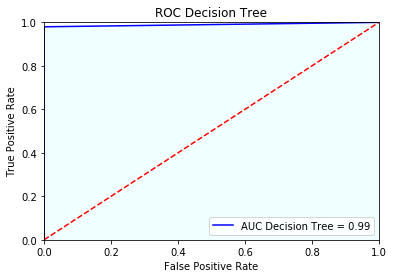

In [268]:
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 5.2. Random Forest Evaluation

In [269]:
rfc_prob = rfc_grid.predict_proba(X_test)
probrfc = rfc_prob[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, probrfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

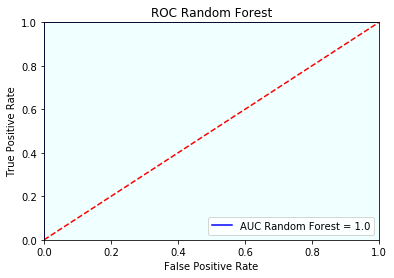

In [270]:
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'blue', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 5.3. Gradient Boost Evaluation

In [271]:
gbc_prob = gbc_grid.predict_proba(X_test)
probgbc = gbc_prob[:,1]
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, probgbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

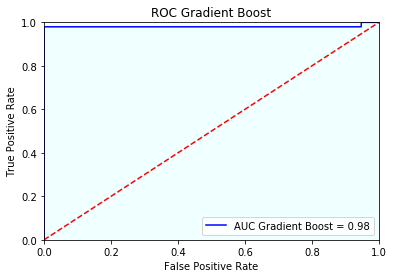

In [272]:
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

### 5.4. Model Comparation

##### By accuracy_score, precision_score, recall_score, f1_score

In [273]:
modelComparation = pd.DataFrame({
    "Decision Tree": [accuracy_score(y_test, dtc_grid_pred),precision_score(y_test, dtc_grid_pred),recall_score(y_test, dtc_grid_pred),f1_score(y_test, dtc_grid_pred)],
    "Random Forest": [accuracy_score(y_test, rfc_grid_pred),precision_score(y_test, rfc_grid_pred),recall_score(y_test, rfc_grid_pred),f1_score(y_test, rfc_grid_pred)],
    "Gradient Boost": [accuracy_score(y_test, gbc_grid_pred),precision_score(y_test, gbc_grid_pred),recall_score(y_test, gbc_grid_pred),f1_score(y_test, gbc_grid_pred)]
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])
modelComparation

,Decision Tree,Random Forest,Gradient Boost
Accuracy Score,0.999592,0.997553,0.999592
Precision Score,1.000000,1.000000,1.000000
Recall Score,0.979592,0.877551,0.979592
F1 Score,0.989691,0.934783,0.989691


Dari hasil tersebut dapat disimpulkan untuk ketiga model tersebut memiliki precision dan accuracy yang relative sama. Hanya saja untuk random forest sedikit lebih rendah dikarenakan nilai recall yang lebih rendah. Maka untuk memvalidasi kembali model tersebut akan digunakan ROC dan AUC score untuk mengetahui sensitifitas ketiga model terhadap threshold yang digunakan.

##### By ROC_AUC_Score

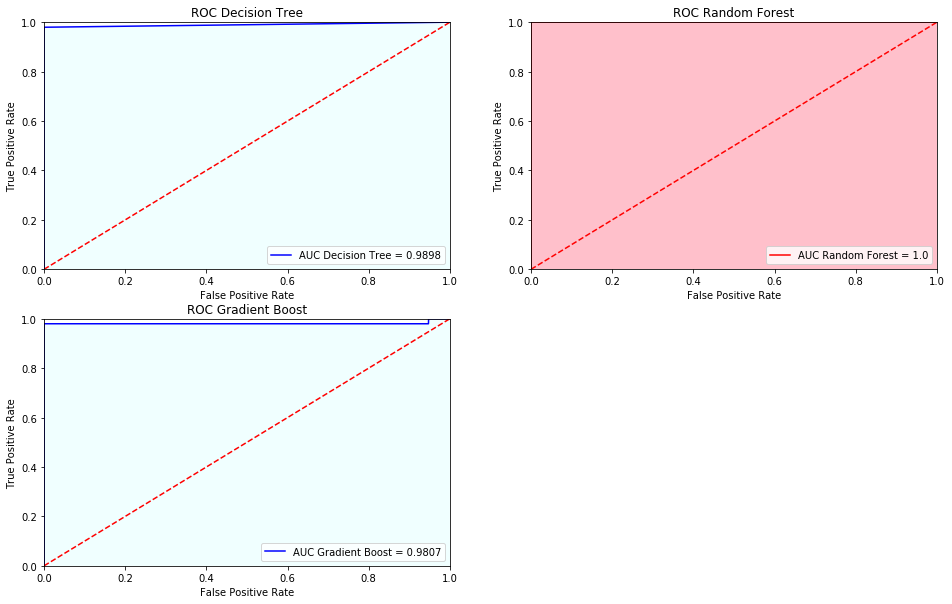

In [274]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

plt.subplot(223)
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

Dari ketiga grafik AUC dapat dilihat bahwa model yang terbaik untuk digunakan adalah model **Random Forest** karena memiliki nilai AUC score sebesar **1.0**

Untuk titik krusial yang menjadi acuan adalah **Mengurangi probabilitas model melakukan *False Negative***. Hal ini dikarenakan untuk model ini akan digunakan sebagai screening awal untuk pemilihan pemain baru. Dimana jika terjadi false Negative pada prediksi, maka akan menciptakan opportunity loss bagi club basket tersebut.

## 6. Random Oversampling SMOTE

In [275]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=1.0, k_neighbors=5)
Xsmot_train, ysmot_train = sm.fit_sample(X_train, y_train)

In [276]:
grid_search_rfcsmot = GridSearchCV(estimator=rfc, param_grid=param_grid_rfc, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search_rfcsmot.fit(Xsmot_train, ysmot_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [277]:
rfcsmot = grid_search_rfcsmot.best_estimator_

In [278]:
rfcsmot_pred = rfcsmot.predict(X_test)
rfcsmot_proba = rfcsmot.predict_proba(X_test)

In [279]:
print(classification_report(y_test, rfcsmot_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.96      0.98        49

    accuracy                           1.00      2452
   macro avg       1.00      0.98      0.99      2452
weighted avg       1.00      1.00      1.00      2452



In [280]:
print(confusion_matrix(y_test, rfcsmot_pred))

[[2403    0]
 [   2   47]]


In [281]:
print(classification_report(y_test, rfc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.88      0.93        49

    accuracy                           1.00      2452
   macro avg       1.00      0.94      0.97      2452
weighted avg       1.00      1.00      1.00      2452



In [282]:
print(confusion_matrix(y_test, rfc_grid_pred))

[[2403    0]
 [   6   43]]


In [283]:
rfcsmot_prob = rfcsmot.predict_proba(X_test)
probrfcsmot = rfcsmot_prob[:,1]
fpr_rfcsmot, tpr_rfcsmot, threshold_rfsmotc = roc_curve(y_test, probrfcsmot)
roc_auc_rfcsmot = auc(fpr_rfcsmot, tpr_rfcsmot)

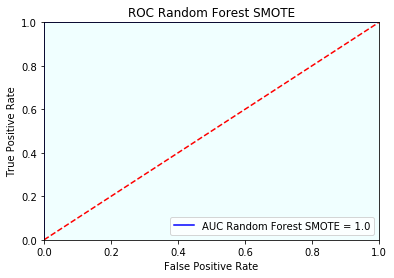

In [284]:
plt.title('ROC Random Forest SMOTE')
plt.plot(fpr_rfcsmot, tpr_rfcsmot, 'blue', label='AUC Random Forest SMOTE = {}'.format(round(roc_auc_rfcsmot,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfcsmot, tpr_rfcsmot, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

#### Model Comparation

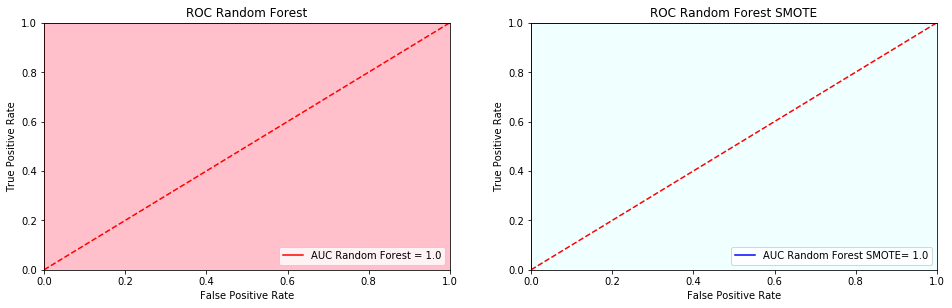

In [285]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')

plt.subplot(222)
plt.title('ROC Random Forest SMOTE')
plt.plot(fpr_rfcsmot, tpr_rfcsmot, 'blue', label='AUC Random Forest SMOTE= {}'.format(round(roc_auc_rfcsmot,2)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfcsmot, tpr_rfcsmot, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')

Pada hasil confusion matrix yang telah dilakukan didapatkan hasil bahwa menggunakan oversampling SMOTE dapat menghasilkan nilai precision yang lebih baik. Sedangkan untuk AUC didapakatkan hasil yang sama sebesar **1.0**

Sehingga untuk model prediksi tersebut akan menggunakan model yang sudah dilakukan **oversampling SMOTE**.

## 7. Threshold Selection

In [304]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataScaled, target, test_size=.1, random_state=101)
X_train3, X_test3, y_train3, y_test3 = train_test_split(dataScaled, target, test_size=.3, random_state=101)
X_train4, X_test4, y_train4, y_test4 = train_test_split(dataScaled, target, test_size=.4, random_state=101)
X_train5, X_test5, y_train5, y_test5 = train_test_split(dataScaled, target, test_size=.5, random_state=101)

In [299]:
grid_search_rfc.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 10,
 'n_estimators': 100}

In [302]:
rfcc = RandomForestClassifier(bootstrap= False, criterion = 'entropy', max_depth=15, min_samples_split=10, n_estimators=100)

In [305]:
rfcc1 = rfcc.fit(X_train1, y_train1)
rfcc_pred1 = rfcc1.predict(X_test1)
print(classification_report(y_test1, rfcc_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1088
           1       1.00      0.89      0.94        27

    accuracy                           1.00      1115
   macro avg       1.00      0.94      0.97      1115
weighted avg       1.00      1.00      1.00      1115



In [306]:
rfcc3 = rfcc.fit(X_train3, y_train3)
rfcc_pred3 = rfcc3.predict(X_test3)
print(classification_report(y_test3, rfcc_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3274
           1       1.00      0.94      0.97        70

    accuracy                           1.00      3344
   macro avg       1.00      0.97      0.98      3344
weighted avg       1.00      1.00      1.00      3344



In [307]:
rfcc4 = rfcc.fit(X_train4, y_train4)
rfcc_pred4 = rfcc4.predict(X_test4)
print(classification_report(y_test4, rfcc_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4366
           1       0.98      0.93      0.96        92

    accuracy                           1.00      4458
   macro avg       0.99      0.97      0.98      4458
weighted avg       1.00      1.00      1.00      4458



In [308]:
rfcc5 = rfcc.fit(X_train5, y_train5)
rfcc_pred5 = rfcc5.predict(X_test5)
print(classification_report(y_test5, rfcc_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5458
           1       0.98      0.93      0.96       115

    accuracy                           1.00      5573
   macro avg       0.99      0.97      0.98      5573
weighted avg       1.00      1.00      1.00      5573



In [311]:
# Threshold Pertama
print(classification_report(y_test, rfc_grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2403
           1       1.00      0.96      0.98        49

    accuracy                           1.00      2452
   macro avg       1.00      0.98      0.99      2452
weighted avg       1.00      1.00      1.00      2452



Berdasarkan dari confusion matrix diatas.
Dapat disimpulkan bahwa Threshold **awal (0.22)** adalah threshold **terbaik**.

## 8. Production

In [287]:
dfCandidate = pd.read_csv('ibl_player.csv')
dfCandidate.head()

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,draft_year,draft_round,draft_number,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,2017,2,10,2.3,-0.3,0.080,0.087,0.091,0.327,0.237
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,2018,3,20,2.3,1.2,0.054,0.077,0.087,0.415,0.277
2,2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,2019,1,35,1.3,2.4,0.480,0.102,0.122,0.502,0.352
3,3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,2018,5,8,2.2,10.4,0.650,0.092,0.192,0.592,0.071
4,4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,2017,3,10,1.8,12.0,0.010,0.103,0.133,0.322,0.143


In [288]:
data.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040


In [289]:
dataPredict = dfCandidate
dataPredict['player_height'] = dataPredict['height']
dataPredict['player_weight'] = dataPredict['weight']
dataPredict = dfCandidate.drop(['Unnamed: 0', 'name', 'club', 'country','draft_year',
                     'draft_round','draft_number', 'height', 'weight'], axis=1)

In [290]:
dataPredict

,age,pts,reb,gp,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,player_height,player_weight
0,24,7,6,55,2.3,-0.3,0.080,0.087,0.091,0.327,0.237,190,90
1,21,6,3,15,2.3,1.2,0.054,0.077,0.087,0.415,0.277,185,86
2,23,10,3,64,1.3,2.4,0.480,0.102,0.122,0.502,0.352,178,83
3,26,11,4,27,2.2,10.4,0.650,0.092,0.192,0.592,0.071,185,75
4,20,5,2,15,1.8,12.0,0.010,0.103,0.133,0.322,0.143,183,80
5,21,4,10,49,2.5,9.0,0.120,0.118,0.118,0.303,0.238,191,85
6,25,7,5,20,2.2,9.4,0.055,0.086,0.186,0.386,0.226,188,90
7,23,1,2,31,1.2,8.4,0.018,0.129,0.029,0.429,0.189,179,87
8,21,9,8,24,1.4,13.1,0.065,0.110,0.045,0.410,0.220,177,80
9,24,6,5,36,1.7,12.5,0.053,0.137,0.125,0.537,0.237,182,85


In [291]:
scaler.fit(dataPredict)
scaled_features_predict = scaler.transform(dataPredict)
dataPredictScaled = pd.DataFrame(scaled_features_predict, columns=data.columns)
dataPredictScaled.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0.635999,0.142857,0.483494,1.315983,0.914732,-1.739891,-0.376000,-0.922386,-0.435481,-1.044493,0.252815,1.329114,1.316322
1,-0.953998,-0.214286,-0.725241,-1.143798,0.914732,-1.418086,-0.500535,-1.461793,-0.515386,-0.080008,0.814626,0.257248,0.423900
2,0.106000,1.214286,-0.725241,1.869433,-1.316322,-1.160642,1.539924,-0.113275,0.183781,0.873517,1.868022,-1.243365,-0.245416
3,1.695997,1.571429,-0.322329,-0.405864,0.691627,0.555649,2.354192,-0.652682,1.582115,1.859922,-2.078701,0.257248,-2.030259
4,-1.483997,-0.571429,-1.128152,-1.143798,-0.200795,0.898908,-0.711287,-0.059335,0.403519,-1.099294,-1.067441,-0.171499,-0.914732


In [292]:
candidatePrediction = rfcsmot.predict(dataPredictScaled)

In [293]:
dfCandidate['best_player_prediction'] = candidatePrediction

In [294]:
dfCandidate

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,player_height,player_weight,best_player_prediction
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,...,2.3,-0.3,0.080,0.087,0.091,0.327,0.237,190,90,0
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,...,2.3,1.2,0.054,0.077,0.087,0.415,0.277,185,86,0
2,2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,...,1.3,2.4,0.480,0.102,0.122,0.502,0.352,178,83,0
3,3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,...,2.2,10.4,0.650,0.092,0.192,0.592,0.071,185,75,0
4,4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,...,1.8,12.0,0.010,0.103,0.133,0.322,0.143,183,80,0
5,5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,...,2.5,9.0,0.120,0.118,0.118,0.303,0.238,191,85,0
6,6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,...,2.2,9.4,0.055,0.086,0.186,0.386,0.226,188,90,0
7,7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,...,1.2,8.4,0.018,0.129,0.029,0.429,0.189,179,87,0
8,8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,...,1.4,13.1,0.065,0.110,0.045,0.410,0.220,177,80,0
9,9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,...,1.7,12.5,0.053,0.137,0.125,0.537,0.237,182,85,0


In [315]:
dfCandidate['keterangan']=dfCandidate.apply(lambda x: 'tidak lolos' if (x['best_player_prediction']== 0) else ' lolos', axis=1)
dfCandidate

,Unnamed: 0,name,club,country,age,height,weight,pts,reb,gp,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,player_height,player_weight,best_player_prediction,keterangan
0,0,Andakara Prastawa Dyaksa,Pelita Jaya Bakrie,Indonesia,24,190,90,7,6,55,...,-0.3,0.080,0.087,0.091,0.327,0.237,190,90,0,tidak lolos
1,1,Reggie Mononimbar,Pelita Jaya Bakrie,Indonesia,21,185,86,6,3,15,...,1.2,0.054,0.077,0.087,0.415,0.277,185,86,0,tidak lolos
2,2,Hardianus Lakudu,Satria Muda Pertamina Jakarta,Indonesia,23,178,83,10,3,64,...,2.4,0.480,0.102,0.122,0.502,0.352,178,83,0,tidak lolos
3,3,Kevin Yonas Sitorus,Satria Muda Pertamina Jakarta,Indonesia,26,185,75,11,4,27,...,10.4,0.650,0.092,0.192,0.592,0.071,185,75,0,tidak lolos
4,4,Arki Dikania Wisnu,Satria Muda Pertamina Jakarta,Indonesia,20,183,80,5,2,15,...,12.0,0.010,0.103,0.133,0.322,0.143,183,80,0,tidak lolos
5,5,Laurentius Steven Oei,Satria Muda Pertamina Jakarta,Indonesia,21,191,85,4,10,49,...,9.0,0.120,0.118,0.118,0.303,0.238,191,85,0,tidak lolos
6,6,Mei Joni,Stapac,Indonesia,25,188,90,7,5,20,...,9.4,0.055,0.086,0.186,0.386,0.226,188,90,0,tidak lolos
7,7,Vincent Rivaldi Kosasih,Stapac,Indonesia,23,179,87,1,2,31,...,8.4,0.018,0.129,0.029,0.429,0.189,179,87,0,tidak lolos
8,8,Hardian Wicaksono,Pacific Caesar Surabaya,Indonesia,21,177,80,9,8,24,...,13.1,0.065,0.110,0.045,0.410,0.220,177,80,0,tidak lolos
9,9,Brandon Jawato,Louvre Surabaya,Indonesia,24,182,85,6,5,36,...,12.5,0.053,0.137,0.125,0.537,0.237,182,85,0,tidak lolos


Dapat dilihat bahwa semua pemain mendapatkan prediksi **0** atau **tidak terklasifikasi** sebagai best player.

Sehingga dapat disimpulkan bahwa **tidak ada kandidat terbaik dari beberapa pemain yang tersedia**.